In this topic, we will use the metric **"Silhouette Coefficient score "** which computes the average of the **Silhouette Coefficient** of all examples in the dataset.
http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

Indeed, when the "ground truth" or when the labels are unknown, we need to evaluate different clusterings using the model itself. The **Silhouette Coefficient** (sklearn.metrics.silhouette_score) is a metric that allows this type of evaluation to be carried out. 

Indeed, a high **Silhouette Coefficient score** - close to 1 - relates to a model with better defined  **Clusters**.  Here we will be using the Kmean implementation of Scikit-Learn. 

The **Silhouette Coefficient** is defined for each sample and is composed of two scores:


a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster.

The **Silhouette Coefficient s** for a single sample is then given as:

$$s = \frac{b - a}{max(a, b)}$$

## 1- Import some useful modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from numpy.random import randn
from scipy.stats import norm

## 2 - generate a dataset with variables coming from 3 different distributions
**For the sake of simplicity we will generate 3 random variables with 3 different gaussian distributions.**

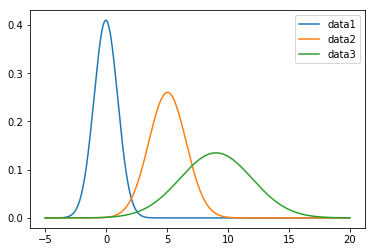

In [2]:
from numpy.random import randn
from scipy.stats import norm
from sklearn.utils import shuffle
data1 = randn(1000,1)
data2 = 1.5*randn(1000,1) + 5
data3 = 3*randn(1000,1) + 9

x_axis = np.arange(-5,20,0.001)
plt.plot(x_axis, norm.pdf(x_axis,np.mean(data1),np.std(data1)), label= "data1")
plt.plot(x_axis, norm.pdf(x_axis,np.mean(data2),np.std(data2)), label= "data2")
plt.plot(x_axis, norm.pdf(x_axis,np.mean(data3),np.std(data3)), label ="data3")
plt.legend(loc = "best")
plt.show();

In [3]:
data_mix=np.vstack((data1, data2, data3))
data = data_mix
data =shuffle(data,random_state=0)

In [4]:
print(data[:10,:])

[[ 1.00603997]
 [ 6.56746374]
 [ 6.57798762]
 [10.2871449 ]
 [14.14508346]
 [ 8.6278693 ]
 [12.46080504]
 [-0.61509287]
 [ 2.45102211]
 [ 4.2246988 ]]


In [5]:
data.shape

(3000, 1)

## 3 - Write a functions that make use of silhouette_score metric to assess the best split in your data provided with unknown labels.

In [6]:
# Visualization function

def Best_Clustering_Viz(data = data, max_clusters = 6 ):
    
    n_clusters_list=[]
    silhouette_list=[]
    
    for n_c in range(2,max_clusters+1): 
        kmeans_model = KMeans(n_clusters=n_c, random_state=42).fit(data) 
        labels = kmeans_model.labels_
        n_clusters_list.append(n_c)
        silhouette_list.append(silhouette_score(data, labels, metric='euclidean'))   
    
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    ax.plot(n_clusters_list,silhouette_list, linewidth=3,label = "Silhouette Score Against # of Clusters")
    ax.set_xlabel("Number of clusters")
    ax.set_ylabel("Silhouette score")
    ax.set_title('Silhouette score according to number of clusters')
    ax.grid(True)
    plt.plot(n_clusters_list[silhouette_list.index(max(silhouette_list))], max(silhouette_list), "tomato", marker="*",
             markersize=20, label = 'Best Silhouette Score')
    
    plt.legend(loc="best",fontsize = 'large')
    plt.show();
    print( " Best Clustering corresponds to the following point : Number of clusters = %i & Silhouette_score = %.2f." 
      %(n_clusters_list[silhouette_list.index(max(silhouette_list))],max(silhouette_list))) 
    
    
#########################################################################################
                        ##############################################################################################
    
# function that returns best parameters i.e. best clustering and silhouette score  

def Best_Clustering_params(data = data, max_clusters = 6 ):
    
    n_clusters_list=[]
    silhouette_list=[]
    
    for n_c in range(2,max_clusters+1): 
        kmeans_model = KMeans(n_clusters=n_c, random_state=42).fit(data) 
        labels = kmeans_model.labels_
        n_clusters_list.append(n_c)
        silhouette_list.append(silhouette_score(data, labels, metric='euclidean'))
    best_params = n_clusters_list[silhouette_list.index(max(silhouette_list))],max(silhouette_list)
    return best_params

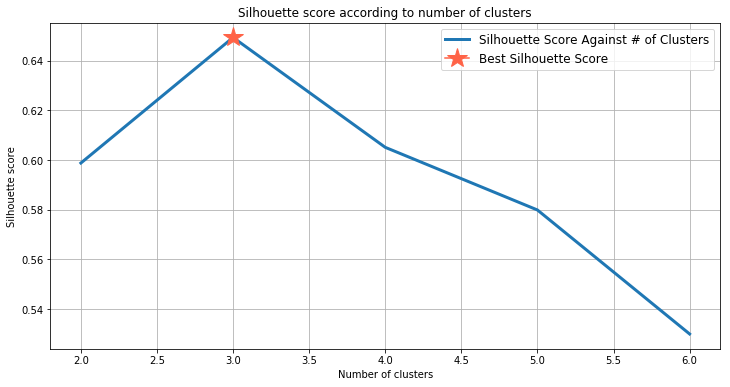

 Best Clustering corresponds to the following point : Number of clusters = 3 & Silhouette_score = 0.65.


In [7]:
Best_Clustering_Viz(data=data)

In [8]:
n_clusters, bs_score = Best_Clustering_params(data = data, max_clusters = 6 )
n_clusters , bs_score

(3, 0.6493708781548122)